In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
from scipy import stats, integrate
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Importando base de dados

<p>Base com todos os dados de BH</p>

In [46]:
dfm = pd.read_csv('../data/bh-calculado-pronto.csv')
dfm.head(4)

,stp,smax,smin,temp,tmax,tmin,dewp,dmax,dmin,hmdy,...,dmin_5,dmin_6,dmax_1,dmax_2,dmax_3,dmax_4,dmax_5,dmax_6,prcp_acum_6,prcp_plus_1
0,913.5,913.8,913.4,20.8,19.0,21.0,19.6,20.1,19.0,90.0,...,20.5,20.2,20.2,20.4,20.6,20.5,20.7,20.4,0.0,0.0
1,913.4,913.6,913.4,20.2,19.3,20.8,19.7,20.2,19.1,95.0,...,20.3,20.5,20.1,20.2,20.4,20.6,20.5,20.7,0.0,0.0
2,914.2,914.2,913.4,20.1,19.4,20.6,19.4,19.9,19.1,96.0,...,20.3,20.3,20.2,20.1,20.2,20.4,20.6,20.5,0.2,0.0
3,915.7,915.7,915.0,21.3,19.3,21.3,19.3,20.6,18.8,88.0,...,19.5,20.1,19.9,19.9,20.2,20.1,20.2,20.4,0.6,0.0


In [47]:
dfm.describe().T

,count,mean,std,min,25%,50%,75%,max
stp,67140.0,905.697340,19.577473,872.8,883.2,915.9,920.0,935.7
smax,67140.0,905.945247,19.588401,873.0,883.5,916.2,920.2,935.8
smin,67140.0,905.447809,19.566561,872.7,883.0,915.6,919.8,935.7
temp,67140.0,22.614024,3.588337,12.6,19.9,21.9,25.1,36.3
tmax,67140.0,16.829605,2.006442,5.5,15.6,17.0,18.3,23.5
tmin,67140.0,23.350287,3.855474,12.7,20.3,22.6,26.2,36.4
dewp,67140.0,17.429257,1.979535,6.7,16.2,17.5,18.8,24.0
dmax,67140.0,21.997577,3.352459,12.5,19.5,21.3,24.2,34.5
dmin,67140.0,16.255356,2.098879,4.2,15.0,16.4,17.8,22.6
hmdy,67140.0,72.189410,16.710176,20.0,60.0,74.0,86.0,99.0


<h2>Mineiração dos dados</h2>

<h3>Rede neural</h3>

In [48]:
target = 'prcp_plus_1'

In [49]:
X = dfm[[col for col in dfm.columns]]
y = dfm[target]

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=12)

In [51]:
print("Training instances   {}, Training features   {}".format(X_train.shape[0], X_train.shape[1]))  
print("Testing instances    {}, Testing features    {}".format(X_test.shape[0], X_test.shape[1]))  

Training instances   60426, Training features   107
Testing instances    6714, Testing features    107


In [52]:
from imblearn.under_sampling import RandomUnderSampler
under = RandomUnderSampler(return_indices=True)

In [53]:
def balancear(_X, _y):
    
    def f(x):
        if x['prcp_plus_1'] == 0.0: 
            return 0
        else:        
            return 1
        
    #Balancear considerando apenas com chuva e sem chuva.    
    _X['type'] = _X.apply(f,axis=1) 
    
    _X_resampled, _y_resampled, idx_resampled = under.fit_sample(_X, _X['type'])
    
    _X = pd.DataFrame(_X_resampled, columns = _X.columns)
    _y = pd.DataFrame(_y_resampled, columns =['type'])
    
    _y = _X['prcp_plus_1']
    
    _X = _X.drop('type',1)
    _X = _X.drop('prcp_plus_1',1)
    
    return _X,_y

In [54]:
X_resampled, y_resampled = balancear(X_train.copy(), y_train.copy())

In [55]:
X_resampled.shape

(14388, 106)

In [56]:
y_resampled.shape

(14388,)

In [57]:
from sklearn.preprocessing import StandardScaler

In [58]:
scaler = StandardScaler()

In [60]:
#X_train.pop(target)
#X_test.pop(target)

In [61]:
X_train

,stp,smax,smin,temp,tmax,tmin,dewp,dmax,dmin,hmdy,...,dmin_4,dmin_5,dmin_6,dmax_1,dmax_2,dmax_3,dmax_4,dmax_5,dmax_6,prcp_acum_6
30007,926.0,926.2,925.3,22.9,19.1,23.0,19.1,22.5,18.6,79.0,...,19.4,16.5,14.8,21.5,22.7,23.5,24.1,25.8,31.2,1.4
21363,916.4,916.9,916.4,22.5,17.6,22.5,18.1,21.9,17.5,74.0,...,18.4,17.2,17.1,21.4,21.5,22.2,22.7,23.7,24.4,0.0
60947,884.4,884.7,884.4,24.1,17.0,25.1,17.3,21.9,15.3,64.0,...,15.4,15.2,15.1,21.3,19.8,17.4,17.2,16.9,17.0,0.0
61285,882.6,883.2,882.5,24.5,16.3,25.2,17.5,21.8,15.7,60.0,...,15.9,16.1,15.6,21.5,20.9,20.5,19.7,17.4,16.9,0.0
53064,881.0,881.7,881.0,25.4,15.3,27.0,17.0,24.4,14.8,54.0,...,15.5,15.8,16.0,22.8,23.0,23.3,23.0,20.8,19.5,21.6
53027,882.4,883.0,882.4,20.3,15.0,20.4,15.7,20.1,15.0,72.0,...,14.6,14.6,14.2,20.3,21.1,21.8,22.1,22.5,22.6,0.0
64251,881.7,882.0,881.7,24.4,18.0,24.8,18.5,24.4,17.8,67.0,...,16.2,16.7,18.2,24.8,25.6,26.1,25.4,23.9,22.3,0.0
48537,883.9,883.9,883.8,21.0,13.7,21.9,14.0,21.0,13.5,63.0,...,15.2,14.9,14.2,21.9,21.9,22.2,22.4,23.3,24.9,0.0
42268,883.1,883.1,882.7,23.8,15.1,25.4,15.1,23.7,14.7,58.0,...,11.4,10.8,12.3,25.4,27.1,27.5,27.6,28.3,27.8,0.0
12617,915.7,916.3,915.7,23.5,17.0,23.5,17.2,22.5,16.4,67.0,...,16.2,16.1,16.0,22.2,21.9,21.2,20.6,20.5,19.9,0.0


In [62]:
X_test

,stp,smax,smin,temp,tmax,tmin,dewp,dmax,dmin,hmdy,...,dmin_4,dmin_5,dmin_6,dmax_1,dmax_2,dmax_3,dmax_4,dmax_5,dmax_6,prcp_acum_6
61328,884.3,884.3,883.7,20.3,17.8,20.4,18.0,18.6,16.9,86.0,...,15.8,15.9,15.8,17.5,17.7,18.1,17.6,17.6,17.9,0.0
56654,884.3,884.5,884.3,19.9,12.2,20.7,12.2,19.9,11.7,61.0,...,12.9,12.0,11.5,20.5,20.0,19.9,20.3,20.8,21.7,0.0
63274,882.6,882.7,882.5,20.0,15.6,20.4,16.3,19.5,15.4,76.0,...,15.1,13.1,17.2,19.4,19.4,19.2,19.1,18.8,19.2,0.0
19479,921.4,921.5,920.9,23.8,16.3,24.2,16.9,22.4,15.9,63.0,...,14.1,14.0,13.7,19.5,18.8,19.7,21.3,21.9,21.9,0.0
29764,929.0,929.4,929.0,27.6,14.3,30.5,15.2,27.6,13.4,44.0,...,14.2,14.5,15.5,28.5,27.5,27.1,26.4,25.1,23.1,0.0
55831,885.0,885.3,884.9,28.6,10.4,30.0,12.5,28.4,9.6,32.0,...,13.9,14.6,15.1,27.4,26.4,24.9,24.6,24.6,24.0,0.0
61383,882.0,882.7,882.0,25.6,14.3,25.6,15.4,22.1,13.2,50.0,...,14.0,14.4,14.3,22.2,22.0,21.7,21.3,18.7,17.3,0.0
66865,882.0,882.8,882.0,18.7,15.6,19.1,15.6,18.5,15.2,82.0,...,14.9,14.8,14.9,19.0,19.4,19.9,20.2,20.3,20.8,0.0
34532,930.4,930.5,930.4,25.7,17.9,26.0,18.7,24.1,17.6,62.0,...,18.0,17.8,17.9,23.0,21.5,20.0,20.1,20.4,20.7,0.0
50078,883.1,883.6,883.1,23.1,15.2,25.4,16.7,23.0,14.4,61.0,...,15.9,16.3,16.4,22.1,21.4,21.6,21.4,20.7,19.1,0.0


In [63]:
len(X_resampled)

14388

In [64]:
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [65]:
X_train_T = scaler.transform(X_train)
X_test_T = scaler.transform(X_test)

In [66]:
X_train_T

array([[ 1.03597682,  1.03297428,  1.0135051 , ...,  1.05725287,
         2.67637012, -0.09820501],
       [ 0.54541639,  0.55800211,  0.55846089, ...,  0.44024463,
         0.66209927, -0.29376065],
       [-1.08978501, -1.0865252 , -1.07765315, ..., -1.55768681,
        -1.52990136, -0.29376065],
       ...,
       [ 1.18416694,  1.18108388,  1.19756793, ..., -0.73500916,
        -0.16730638, -0.29376065],
       [ 1.26081701,  1.27301398,  1.27426078, ..., -0.2355263 ,
        -0.19692801, -0.18201457],
       [ 0.69871653,  0.69079002,  0.69139515, ...,  1.85054918,
         1.81734285, -0.29376065]])

In [67]:
from sklearn.neural_network import MLPRegressor

In [68]:
# Zarate instructions
st_units = (X_train.shape[1] * 2) + 1
sd_units = X_train.shape[1] 

In [69]:
mlp = MLPRegressor(
    hidden_layer_sizes=(st_units,sd_units),  activation='relu', solver='adam', alpha=0.001, batch_size='auto',
    learning_rate='constant', learning_rate_init=0.01, power_t=0.5, max_iter=5000, shuffle=True,
    random_state=9, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True,
    early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

In [70]:
mlp.fit(X_resampled,y_resampled)

MLPRegressor(activation='relu', alpha=0.001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(213, 106), learning_rate='constant',
       learning_rate_init=0.01, max_iter=5000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=9, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [71]:
X_resampled.shape
#X_test_T.shape

(14388, 106)

In [73]:
predictions = mlp.predict(X_test_T)

In [74]:
mlp.score(X_test, y_test)

0.3128676777247733

In [75]:
from sklearn.metrics import mean_squared_error

In [76]:
mean_squared_error(y_test, predictions)

29.12413982563669

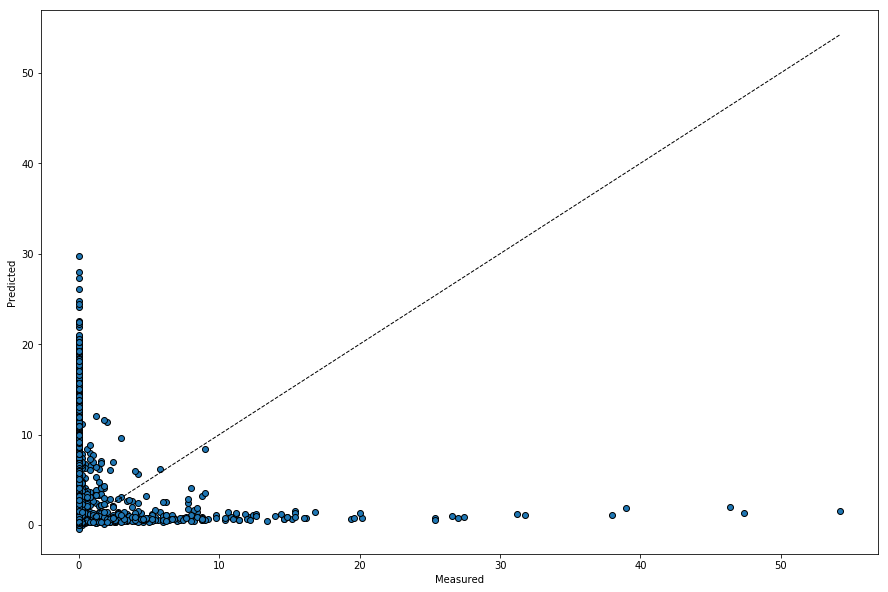

In [77]:
plt.rcParams['figure.figsize'] = [15, 10]
fig, ax = plt.subplots()
ax.scatter(y_test, predictions, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=1)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()